In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils

In [28]:
nails2 = cv2.imread('nails images/Real time data/sample2.jpeg')
nails2

array([[[ 81,  50,  11],
        [ 81,  50,  11],
        [ 81,  50,  11],
        ...,
        [118, 167, 183],
        [118, 167, 183],
        [118, 167, 183]],

       [[ 81,  50,  11],
        [ 81,  50,  11],
        [ 81,  50,  11],
        ...,
        [118, 167, 183],
        [118, 167, 183],
        [118, 167, 183]],

       [[ 81,  50,  11],
        [ 81,  50,  11],
        [ 81,  50,  11],
        ...,
        [117, 166, 182],
        [117, 166, 182],
        [117, 166, 182]],

       ...,

       [[ 34,  42,  49],
        [ 34,  42,  49],
        [ 33,  41,  48],
        ...,
        [ 65,  69,  70],
        [ 65,  69,  70],
        [ 67,  71,  72]],

       [[ 34,  42,  49],
        [ 34,  42,  49],
        [ 33,  41,  48],
        ...,
        [ 68,  72,  73],
        [ 69,  73,  74],
        [ 70,  74,  75]],

       [[ 35,  43,  50],
        [ 34,  42,  49],
        [ 34,  42,  49],
        ...,
        [ 70,  74,  75],
        [ 71,  75,  76],
        [ 72,  76,  77]]

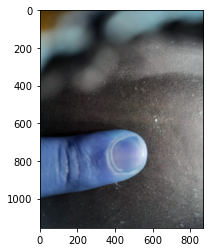

In [29]:
plt.imshow(nails2)


In [4]:

import cv2
import matplotlib.pyplot as plt
# from imutils.video.webcamvideostream import WebcamVideoStream
import numpy as np
import imutils

font = cv2.FONT_HERSHEY_SIMPLEX

def test_HSV(frame):
    HSV_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    (H, S, V) = cv2.split(HSV_frame)
    HH = cv2.equalizeHist(H)
    SH = cv2.equalizeHist(S)
    VH = cv2.equalizeHist(V)
    HSV_H = cv2.merge((HH, SH, VH))
    ret1, SH = cv2.threshold(SH, 0, 255, type=cv2.THRESH_OTSU)
    ret2, VH = cv2.threshold(VH, 0, 255, type=cv2.THRESH_OTSU)
    HSV_mask = cv2.bitwise_and(SH, VH)
    cv2.imshow("nails images/nails2.jpeg", HSV_mask)



def find_hand_old(frame):
    img = frame.copy()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    YCrCb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2YCrCb)
    # YCrCb_frame = cv2.GaussianBlur(YCrCb_frame, (9, 9), 0)
    YCrCb_frame = cv2.GaussianBlur(YCrCb_frame, (3, 3), 0)
    # YCrCb_frame = cv2.GaussianBlur(YCrCb_frame, (1, 1), 0)
    # cv2.imshow("YCrCb_frame_old", YCrCb_frame)
    # print(frame.shape[:2])
    # mask = cv2.inRange(YCrCb_frame, np.array([0, 135, 97]), np.array([255, 177, 127]))#140 170 100 120
    # mask = cv2.inRange(YCrCb_frame, np.array([0, 133, 77]), np.array([255, 173, 127])) # best enough
    mask = cv2.inRange(YCrCb_frame, np.array([0, 127, 75]), np.array([255, 177, 130]))
    bin_mask = mask

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    bin_mask = cv2.dilate(bin_mask, kernel, iterations=5)
    res = cv2.bitwise_and(frame, frame, mask=bin_mask)

    cv2.imshow("nails images/nails2.jpeg", res)

    return img, bin_mask, res

cv2.rectangle(nails2,pt1=(450,280),pt2=(600,150),color=(0,255,0),thickness = 10)

cv2.putText(nails2,text="Nail",org=(500,350),fontFace = font,fontScale=2,color=(255,0,0),thickness=2,lineType=cv2.LINE_AA)
plt.imshow(nails2)


NameError: name 'nails2' is not defined

In [14]:
# import the necessary packages
# from object_detection.utils import label_map_util
import tensorflow as tf
import numpy as np
import cv2
from imutils.video import WebcamVideoStream
# import find_finger as ff


args = {
    "model": "./model/export_model_008/frozen_inference_graph.pb",
    # "model":"/media/todd/38714CA0C89E958E/147/yl_tmp/readingbook/model/export_model_015/frozen_inference_graph.pb",
    "labels": "./record/classes.pbtxt",
    # "labels":"record/classes.pbtxt" ,
    "num_classes": 1,
    "min_confidence": 0.6,
    "class_model": "../model/class_model/p_class_model_1552620432_.h5"}

COLORS = np.random.uniform(0, 255, size=(args["num_classes"], 3))

if __name__ == '__main__':
    model = tf.Graph()

    with model.as_default():
        print("> ====== loading NAIL frozen graph into memory")
        graphDef = tf.GraphDef()

        with tf.gfile.GFile(args["model"], "rb") as f:
            serializedGraph = f.read()
            graphDef.ParseFromString(serializedGraph)
            tf.import_graph_def(graphDef, name="")
        # sess = tf.Session(graph=graphDef)
        print(">  ====== NAIL Inference graph loaded.")
        # return graphDef, sess


    with model.as_default():
        with tf.Session(graph=model) as sess:
            imageTensor = model.get_tensor_by_name("image_tensor:0")
            boxesTensor = model.get_tensor_by_name("detection_boxes:0")

            # for each bounding box we would like to know the score
            # (i.e., probability) and class label
            scoresTensor = model.get_tensor_by_name("detection_scores:0")
            classesTensor = model.get_tensor_by_name("detection_classes:0")
            numDetections = model.get_tensor_by_name("num_detections:0")
            drawboxes = []
            # cap = cv2.VideoCapture(url)
            vs = WebcamVideoStream(src=1)
            vs.start()
            while True:
                frame = vs.read()
                if frame is None:
                    continue
                frame = cv2.flip(frame, 1)
                image = frame
                (H, W) = image.shape[:2]
                # print("H,W:", (H, W))
                output = image.copy()
                img_ff, bin_mask, res = ff.find_hand_old(image.copy())
                image = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
                image = np.expand_dims(image, axis=0)

                (boxes, scores, labels, N) = sess.run(
                    [boxesTensor, scoresTensor, classesTensor, numDetections],
                    feed_dict={imageTensor: image})
                boxes = np.squeeze(boxes)
                scores = np.squeeze(scores)
                labels = np.squeeze(labels)
                boxnum = 0
                box_mid = (0, 0)
                # print("scores_shape:", scores.shape)
                for (box, score, label) in zip(boxes, scores, labels):
                    # print(int(label))
                    # if int(label) != 1:
                    #     continue
                    if score < args["min_confidence"]:
                        continue
                    # scale the bounding box from the range [0, 1] to [W, H]
                    boxnum = boxnum + 1
                    (startY, startX, endY, endX) = box
                    startX = int(startX * W)
                    startY = int(startY * H)
                    endX = int(endX * W)
                    endY = int(endY * H)
                    X_mid = startX + int(abs(endX - startX) / 2)
                    Y_mid = startY + int(abs(endY - startY) / 2)
                    box_mid = (X_mid, Y_mid)
                    # draw the prediction on the output image
                    label_name = 'nail'
                    # idx = int(label["id"]) - 1
                    idx = 0
                    label = "{}: {:.2f}".format(label_name, score)
                    cv2.rectangle(output, (startX, startY), (endX, endY),
                                  COLORS[idx], 2)
                    y = startY - 10 if startY - 10 > 10 else startY + 10
                    cv2.putText(output, label, (startX, y),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.3, COLORS[idx], 1)
                # show the output image
                # print(boxnum)
                if box_mid == (0, 0):
                    drawboxes.clear()
                    cv2.putText(output, 'Nothing', (20, 50),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.75, (77, 255, 9), 2)
                elif boxnum == 1:
                    drawboxes.append(box_mid)
                    if len(drawboxes) == 1:
                        pp = drawboxes[0]
                        cv2.circle(output, pp, 0, (0, 0, 0), thickness=3)
                        # cv2.line(output, pt1, pt2, (0, 0, 0), 2, 2)
                    if len(drawboxes) > 1:
                        num_p = len(drawboxes)
                        for i in range(1, num_p):
                            pt1 = drawboxes[i - 1]
                            pt2 = drawboxes[i]
                            # cv2.circle(output, pp, 0, (0, 0, 0), thickness=3)
                            cv2.line(output, pt1, pt2, (0, 0, 0), 2, 2)
                    cv2.putText(output, 'Point', (20, 50),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.75, (77, 255, 9), 2)
                else:
                    drawboxes.clear()
                    cv2.putText(output, 'Nothing', (20, 50),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.75, (77, 255, 9), 2)
                cv2.imshow("Output", output)
                # cv2.waitKey(0)
                if cv2.waitKey(1) & 0xFF == ord("q"):
                    cv2.destroyAllWindows()
                    break

                    # vs.stop()


> ====== loading NAIL frozen graph into memory


AttributeError: module 'tensorflow' has no attribute 'GraphDef'

In [13]:
pip install tensorflow

  Using cached tensorflow-2.7.0-cp38-cp38-win_amd64.whl (430.8 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached tensorflow_io_gcs_filesystem-0.23.1-cp38-cp38-win_amd64.whl (1.5 MB)
Note: you may need to restart the kernel to use updated packages.  Using cached keras-2.7.0-py2.py3-none-any.whl (1.3 MB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached grpcio-1.42.0-cp38-cp38-win_amd64.whl (3.3 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)



ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\importlib_metadata-3.10.0.dist-info\\direct_url.json'
Consider using the `--user` option or check the permissions.



  Using cached libclang-12.0.0-py2.py3-none-win_amd64.whl (13.1 MB)
  Using cached tensorflow_estimator-2.7.0-py2.py3-none-any.whl (463 kB)
  Using cached tensorboard-2.7.0-py3-none-any.whl (5.8 MB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached flatbuffers-2.0-py2.py3-none-any.whl (26 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached protobuf-3.19.1-cp38-cp38-win_amd64.whl (895 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_plugin_wit-1.8.0-py3-none-any.whl (781 kB)
  Using cached google_auth-2.3.3-py2.py3-none-any.whl (155 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached Markdown-3.3.6-py3-none-any.whl (97 kB)
  Using cached importlib_metadata-4.8.2-py3-none-any.whl (17 kB)
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
 

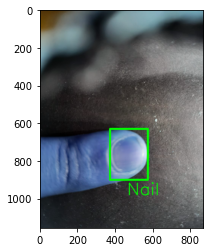

In [42]:

import cv2
import matplotlib.pyplot as plt
# from imutils.video.webcamvideostream import WebcamVideoStream
import numpy as np
import imutils

font = cv2.FONT_HERSHEY_SIMPLEX

def test_HSV(frame):
    HSV_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    (H, S, V) = cv2.split(HSV_frame)
    HH = cv2.equalizeHist(H)
    SH = cv2.equalizeHist(S)
    VH = cv2.equalizeHist(V)
    HSV_H = cv2.merge((HH, SH, VH))
    ret1, SH = cv2.threshold(SH, 0, 255, type=cv2.THRESH_OTSU)
    ret2, VH = cv2.threshold(VH, 0, 255, type=cv2.THRESH_OTSU)
    HSV_mask = cv2.bitwise_and(SH, VH)
    nails3 = cv2.imread('nails images/Real time data/sample1.jpeg')



def find_hand_old(frame):
    img = frame.copy()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    YCrCb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2YCrCb)
    # YCrCb_frame = cv2.GaussianBlur(YCrCb_frame, (9, 9), 0)
    YCrCb_frame = cv2.GaussianBlur(YCrCb_frame, (3, 3), 0)
    # YCrCb_frame = cv2.GaussianBlur(YCrCb_frame, (1, 1), 0)
    # cv2.imshow("YCrCb_frame_old", YCrCb_frame)
    # print(frame.shape[:2])
    # mask = cv2.inRange(YCrCb_frame, np.array([0, 135, 97]), np.array([255, 177, 127]))#140 170 100 120
    # mask = cv2.inRange(YCrCb_frame, np.array([0, 133, 77]), np.array([255, 173, 127])) # best enough
    mask = cv2.inRange(YCrCb_frame, np.array([0, 127, 75]), np.array([255, 177, 130]))
    bin_mask = mask

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    bin_mask = cv2.dilate(bin_mask, kernel, iterations=5)
    res = cv2.bitwise_and(frame, frame, mask=bin_mask)

    cv2.imshow("nails images/Real time data/sample1.jpeg", res)

    return img, bin_mask, res
nails40 = cv2.imread('nails images/Real time data/sample2.jpeg')
cv2.rectangle(nails40,pt1=(370,900),pt2=(570,630),color=(0,255,0),thickness = 10)
# cv2.rectangle(nails40,pt1=(350,340),pt2=(430,240),color=(0,255,0),thickness = 10)
cv2.putText(nails40,text="Nail",org=(460,980),fontFace = font,fontScale=3,color=(0,255,0),thickness=3,lineType=cv2.LINE_AA)
# cv2.putText(nails40,text="Nail",org=(410,415),fontFace = font,fontScale=2,color=(255,0,0),thickness=2,lineType=cv2.LINE_AA)
# cv2.putText(nails40,text="Nail",org=(150,385),fontFace = font,fontScale=2,color=(255,0,0),thickness=2,lineType=cv2.LINE_AA)
plt.imshow(nails40)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image